## <Center> Classification with SVM
    
<Center><author> Zander Bonnet
    
<center><Date> Aug 28, 2024

The chosen data set is the dry beans dataset from the UCI machine-learning repository. His dataset is a collection of 13611 observations of 16 features derived from dry bean pictures. I will use this data set to classify the beans based on the data from their photographs.

SVM is a supervised machine-learning algorithm used for clustering a regression. What sets SVM apart from other algorithms is that it utilizes a kernel algorithm to find the optimal hyperplane to separate the data. It can do this by increasing the dimensionality of the data to a point that it can separate the data most optimally.  The algorithm first uses the kernel to increase the dimensions of the data and then it finds the optimal separation of the classes.

In SVM the kernel is a function that maps the input data to a higher dimension. The hyperplane is the plane that most effectively separates the classes in the higher dimension space. A decision boundary is the value that the hyperplane separates the classes at in the N-dimensional space.

The maximum margin is the margin at which the hyperplane creates the largest possible distance between groups. The decision vectors are the data points that are the closest to the hyperplane. The maximum margin hyperplane is the hyperplane that best separates two classes. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.pipeline  import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, roc_curve, auc

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
dry_bean = fetch_ucirepo(id=602) 
  
# data (as pandas dataframes) 
X = dry_bean.data.features 
y = dry_bean.data.targets 
  
# metadata 
print(dry_bean.metadata) 
  
# variable information 
print(dry_bean.variables) 

{'uci_id': 602, 'name': 'Dry Bean', 'repository_url': 'https://archive.ics.uci.edu/dataset/602/dry+bean+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/602/data.csv', 'abstract': 'Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 13611, 'num_features': 16, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Thu Mar 28 2024', 'dataset_doi': '10.24432/C50S4B', 'creators': [], 'intro_paper': {'title': 'Multiclass classification of dry beans using computer vision and machine learning techniques', 'authors': 'M. Koklu, Ilker Ali Özkan', 'published_in': 'Computers and Electronic

In [3]:
X.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRatio  \
0  28395    610.291       208.178117       173.888747     1.197191   
1  28734    638.018       200.524796       182.734419     1.097356   
2  29380    624.110       212.826130       175.931143     1.209713   
3  30008    645.884       210.557999       182.516516     1.153638   
4  30140    620.134       201.847882       190.279279     1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  Roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
0     0.913358      0.007332      0.003147      0.834222      0.998724  
1     0.953861      0.006979      0.003564      0.909851      0.998430  
2     0.908774      0.007244      0.003048      0.825871      0.999066  
3     0.928329      0.007017      0.003215      0.861794      0.994199  
4     0.970516      0.006697      0.003665      0.941900      0.999166

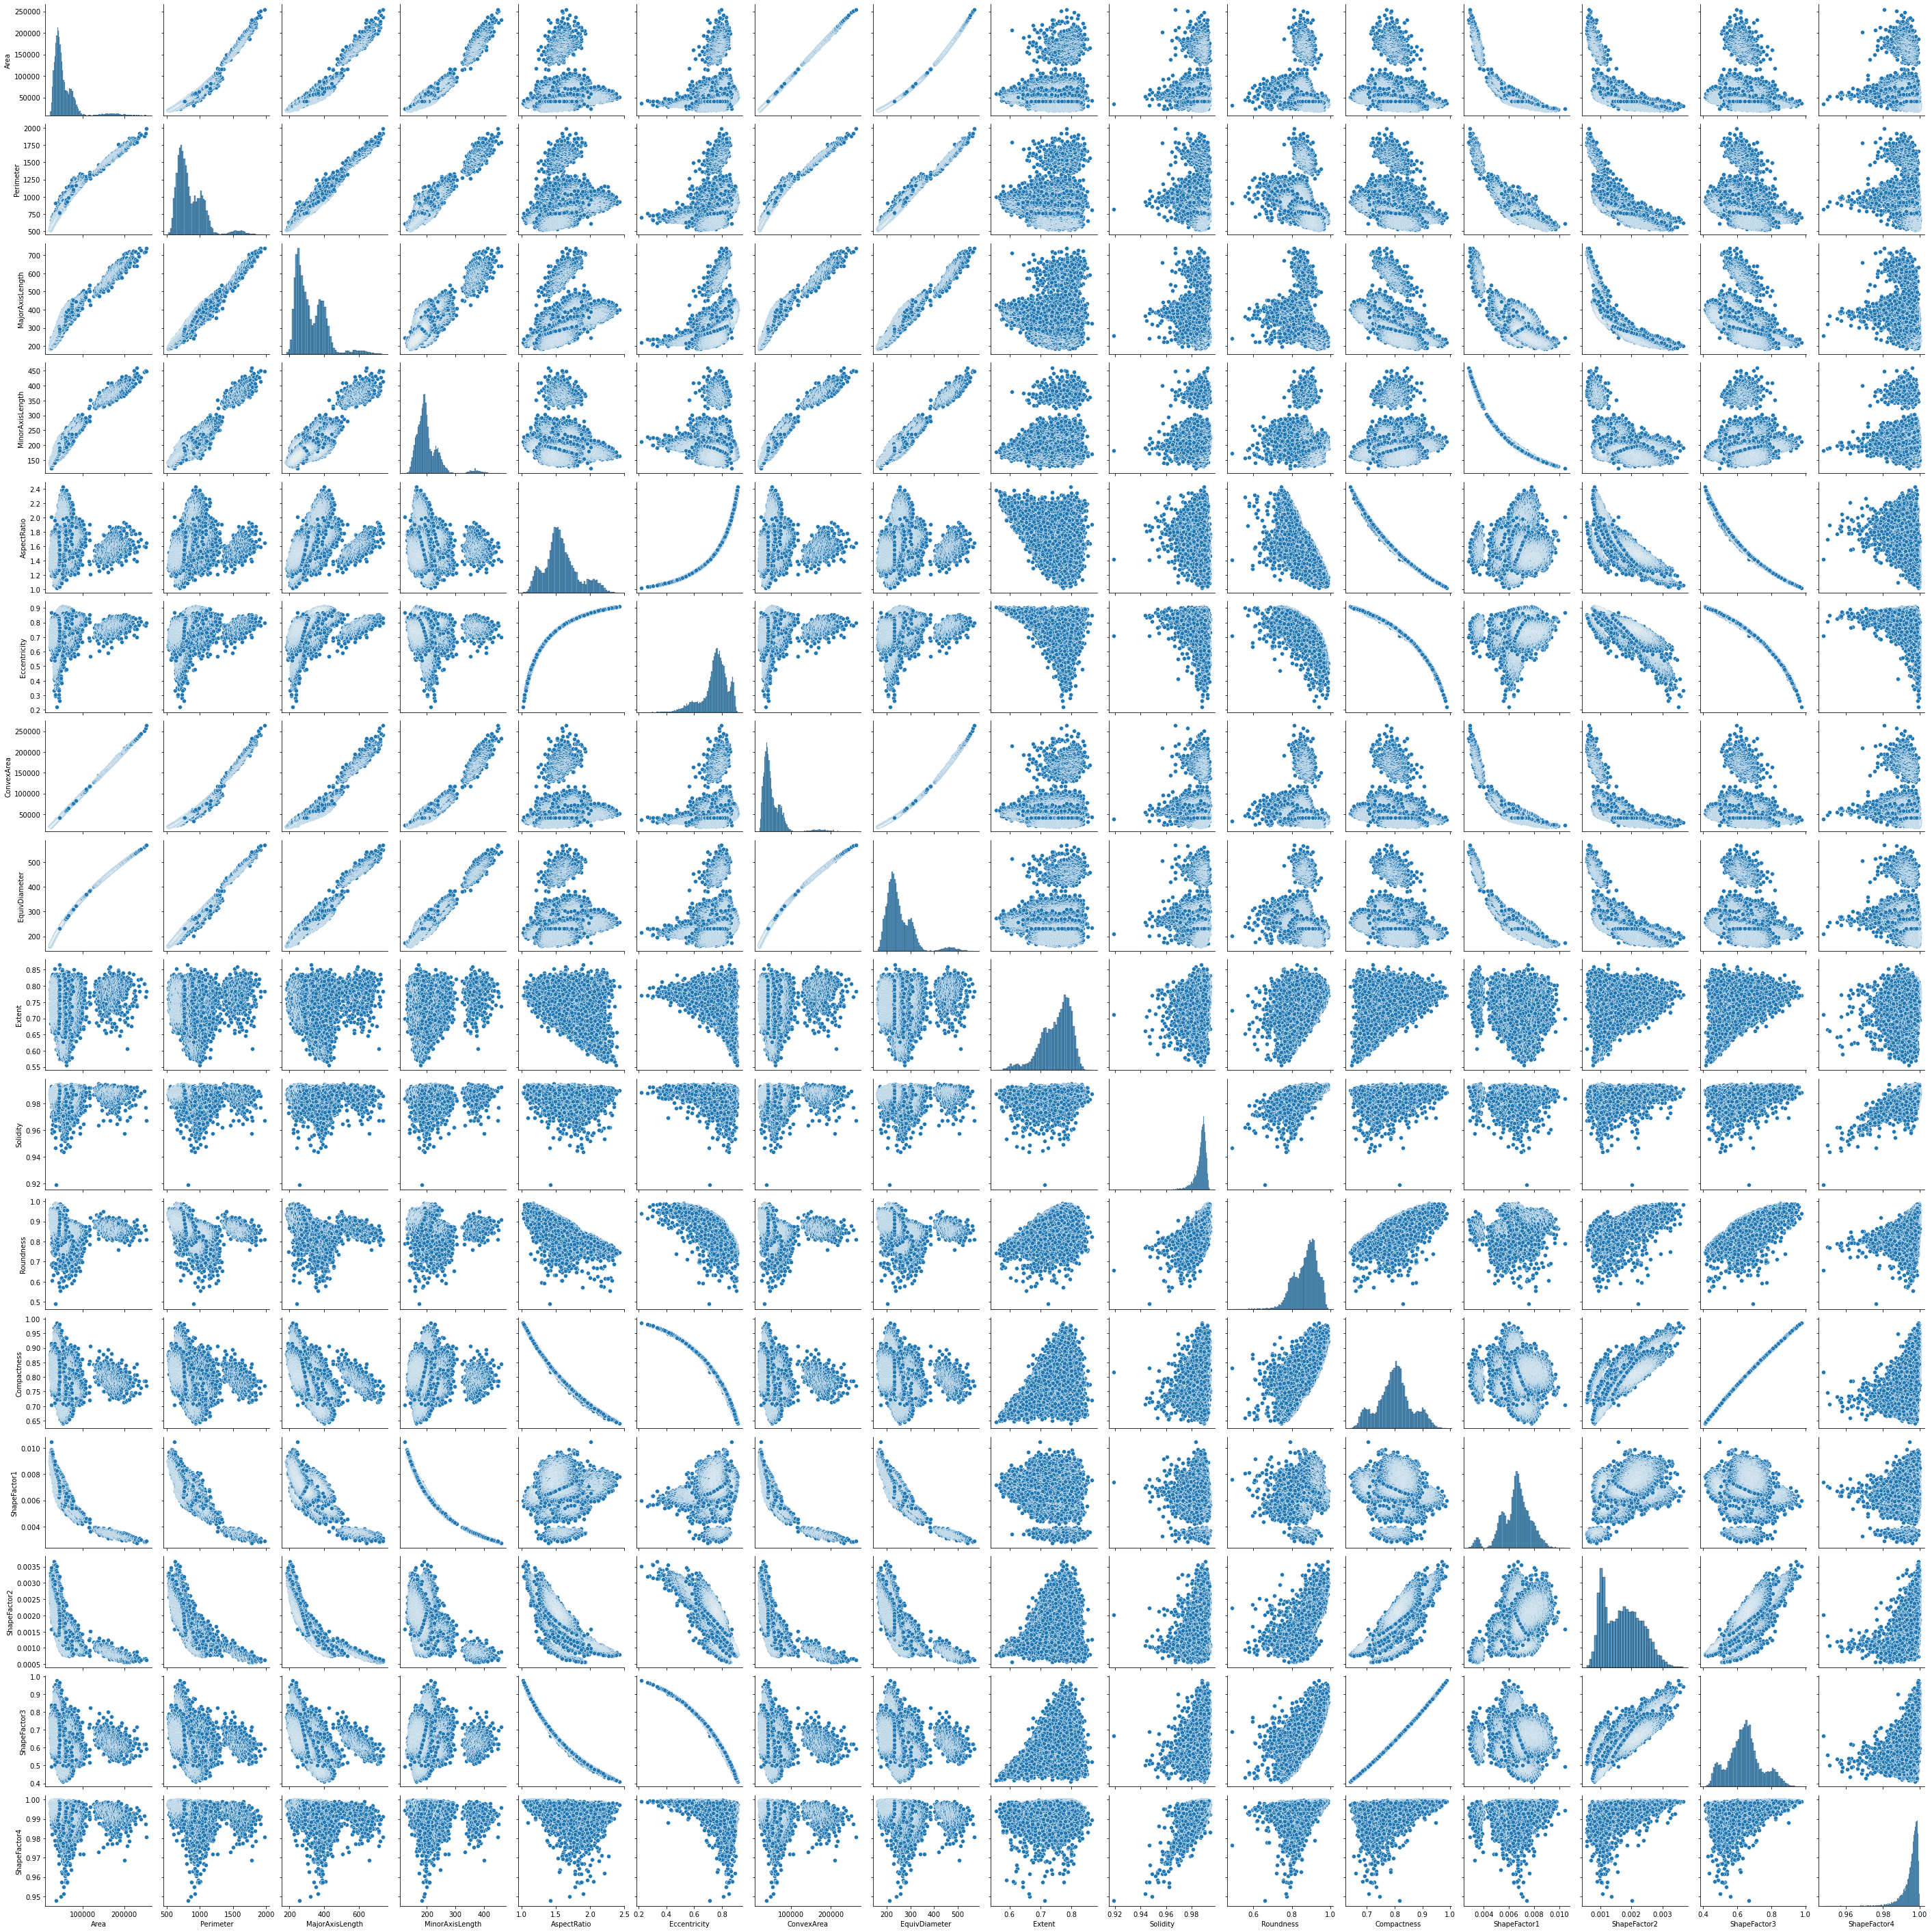

In [4]:
sns.pairplot(X)
plt.show()

No unusual features and no missing data.

How accurately can we predict the class of a dry bean based on its photograph?

Will some classes be too similar to tell apart?

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= .2, random_state=10)

In [6]:
svm = make_pipeline(StandardScaler(),SVC(kernel='linear'))
svm.fit(X_train, y_train.values.ravel())

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

In [7]:
pred = svm.predict(X_test)

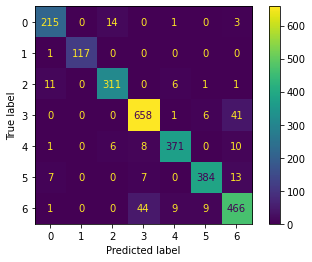

In [8]:
cm = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(confusion_matrix = cm).plot()
plt.show()

In [9]:
accuracy_score(y_test, pred)

0.9261843554902681

In [10]:
kf = KFold(n_splits=5, shuffle=True, random_state=100)
score = cross_val_score(make_pipeline(StandardScaler(),SVC(kernel='linear')),
                        X, y.values.ravel(), cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.92691884 0.9283615  0.92799412 0.93277002 0.91623806]
Average score: 0.93


In my analysis, we can see that not only is the model very effective in predicting the classes of the dry bean based on the data from the photos, but it is also very accurate. In the confusion matrix, we can see that almost all groups have distinct differentiation, except for groups 3 and 6. These two groups seem to have a small level of overlap between them causing some false classification. The accuracy score of about 92% shows the model is performing very well. We cannot perform an ROC-AUC curve as there is more than one class,  but the cross-validation metrics show that the model performs well across multiple subsets of the data. Showing that no data is visibly creating bias in the model.

## <center> Reference
Dry Bean. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C50S4B.
    
